In [18]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
root_path = '/data/zak/robot/'
labels_path = os.path.join(root_path, 'labels')
os.listdir(labels_path)

['uc', '.ipynb_checkpoints', 'erb', 'nh', 'heracleia', 'mocap']

In [3]:
dataset_path = os.path.join(labels_path, 'heracleia')
os.listdir(dataset_path)

['info.csv',
 'labels_balanced.csv',
 'labels_christos.csv',
 '.ipynb_checkpoints',
 'labels.csv',
 'labels_old.csv']

In [4]:
df = pd.read_csv(os.path.join(dataset_path, 'info.csv'))
df.head()

,Unnamed: 0,dataset,date,jointLabeled,img,joints,front_laser,label
0,0,heracleia,8_12_un,False,/data/zak/robot/extracted/heracleia/8_12_un/im...,/data/zak/robot/extracted/heracleia/8_12_un/jo...,/data/zak/robot/extracted/heracleia/8_12_un/fr...,NaN
1,1,heracleia,8_12_un,False,/data/zak/robot/extracted/heracleia/8_12_un/im...,/data/zak/robot/extracted/heracleia/8_12_un/jo...,/data/zak/robot/extracted/heracleia/8_12_un/fr...,NaN
2,2,heracleia,8_12_un,False,/data/zak/robot/extracted/heracleia/8_12_un/im...,/data/zak/robot/extracted/heracleia/8_12_un/jo...,/data/zak/robot/extracted/heracleia/8_12_un/fr...,NaN
3,3,heracleia,8_12_un,False,/data/zak/robot/extracted/heracleia/8_12_un/im...,/data/zak/robot/extracted/heracleia/8_12_un/jo...,/data/zak/robot/extracted/heracleia/8_12_un/fr...,NaN
4,4,heracleia,8_12_un,False,/data/zak/robot/extracted/heracleia/8_12_un/im...,/data/zak/robot/extracted/heracleia/8_12_un/jo...,/data/zak/robot/extracted/heracleia/8_12_un/fr...,NaN


In [5]:
def get_velocities(path):
    with open(path, 'rb') as f:
        values = pickle.load(f)
        
    return values['velocity'] 

In [6]:
df['velocities'] = df.joints.apply(lambda path: get_velocities(path))

In [7]:
df.head()

,Unnamed: 0,dataset,date,jointLabeled,img,joints,front_laser,label,velocities
0,0,heracleia,8_12_un,False,/data/zak/robot/extracted/heracleia/8_12_un/im...,/data/zak/robot/extracted/heracleia/8_12_un/jo...,/data/zak/robot/extracted/heracleia/8_12_un/fr...,NaN,"(0.0, -0.0, -2.5071599123218208e-05, 0.0008775..."
1,1,heracleia,8_12_un,False,/data/zak/robot/extracted/heracleia/8_12_un/im...,/data/zak/robot/extracted/heracleia/8_12_un/jo...,/data/zak/robot/extracted/heracleia/8_12_un/fr...,NaN,"(0.0, -0.0, -2.5071599123218208e-05, 0.0003510..."
2,2,heracleia,8_12_un,False,/data/zak/robot/extracted/heracleia/8_12_un/im...,/data/zak/robot/extracted/heracleia/8_12_un/jo...,/data/zak/robot/extracted/heracleia/8_12_un/fr...,NaN,"(0.0, -0.0, 0.00020057279298574566, 0.00030085..."
3,3,heracleia,8_12_un,False,/data/zak/robot/extracted/heracleia/8_12_un/im...,/data/zak/robot/extracted/heracleia/8_12_un/jo...,/data/zak/robot/extracted/heracleia/8_12_un/fr...,NaN,"(0.0, -0.0, 0.0003760739868482731, 0.000275787..."
4,4,heracleia,8_12_un,False,/data/zak/robot/extracted/heracleia/8_12_un/im...,/data/zak/robot/extracted/heracleia/8_12_un/jo...,/data/zak/robot/extracted/heracleia/8_12_un/fr...,NaN,"(0.0, -0.0, 0.0006769331763268916, 0.000250715..."


In [8]:
print('BL, BR, FL, FR')
x = df.sample()['velocities'].item()
x

BL, BR, FL, FR


(-3.895023353386688, 4.65391558724738, -3.9920755135926655, 4.538862018870931)

In [9]:
type(x)

tuple

In [15]:
BL = df[['velocities']].applymap(lambda x: x[0])
BR = df[['velocities']].applymap(lambda x: x[1])
FL = df[['velocities']].applymap(lambda x: x[2])
FR = df[['velocities']].applymap(lambda x: x[3])

In [16]:
print(len(BL), len(BR), len(FL), len(FR))

17295 17295 17295 17295


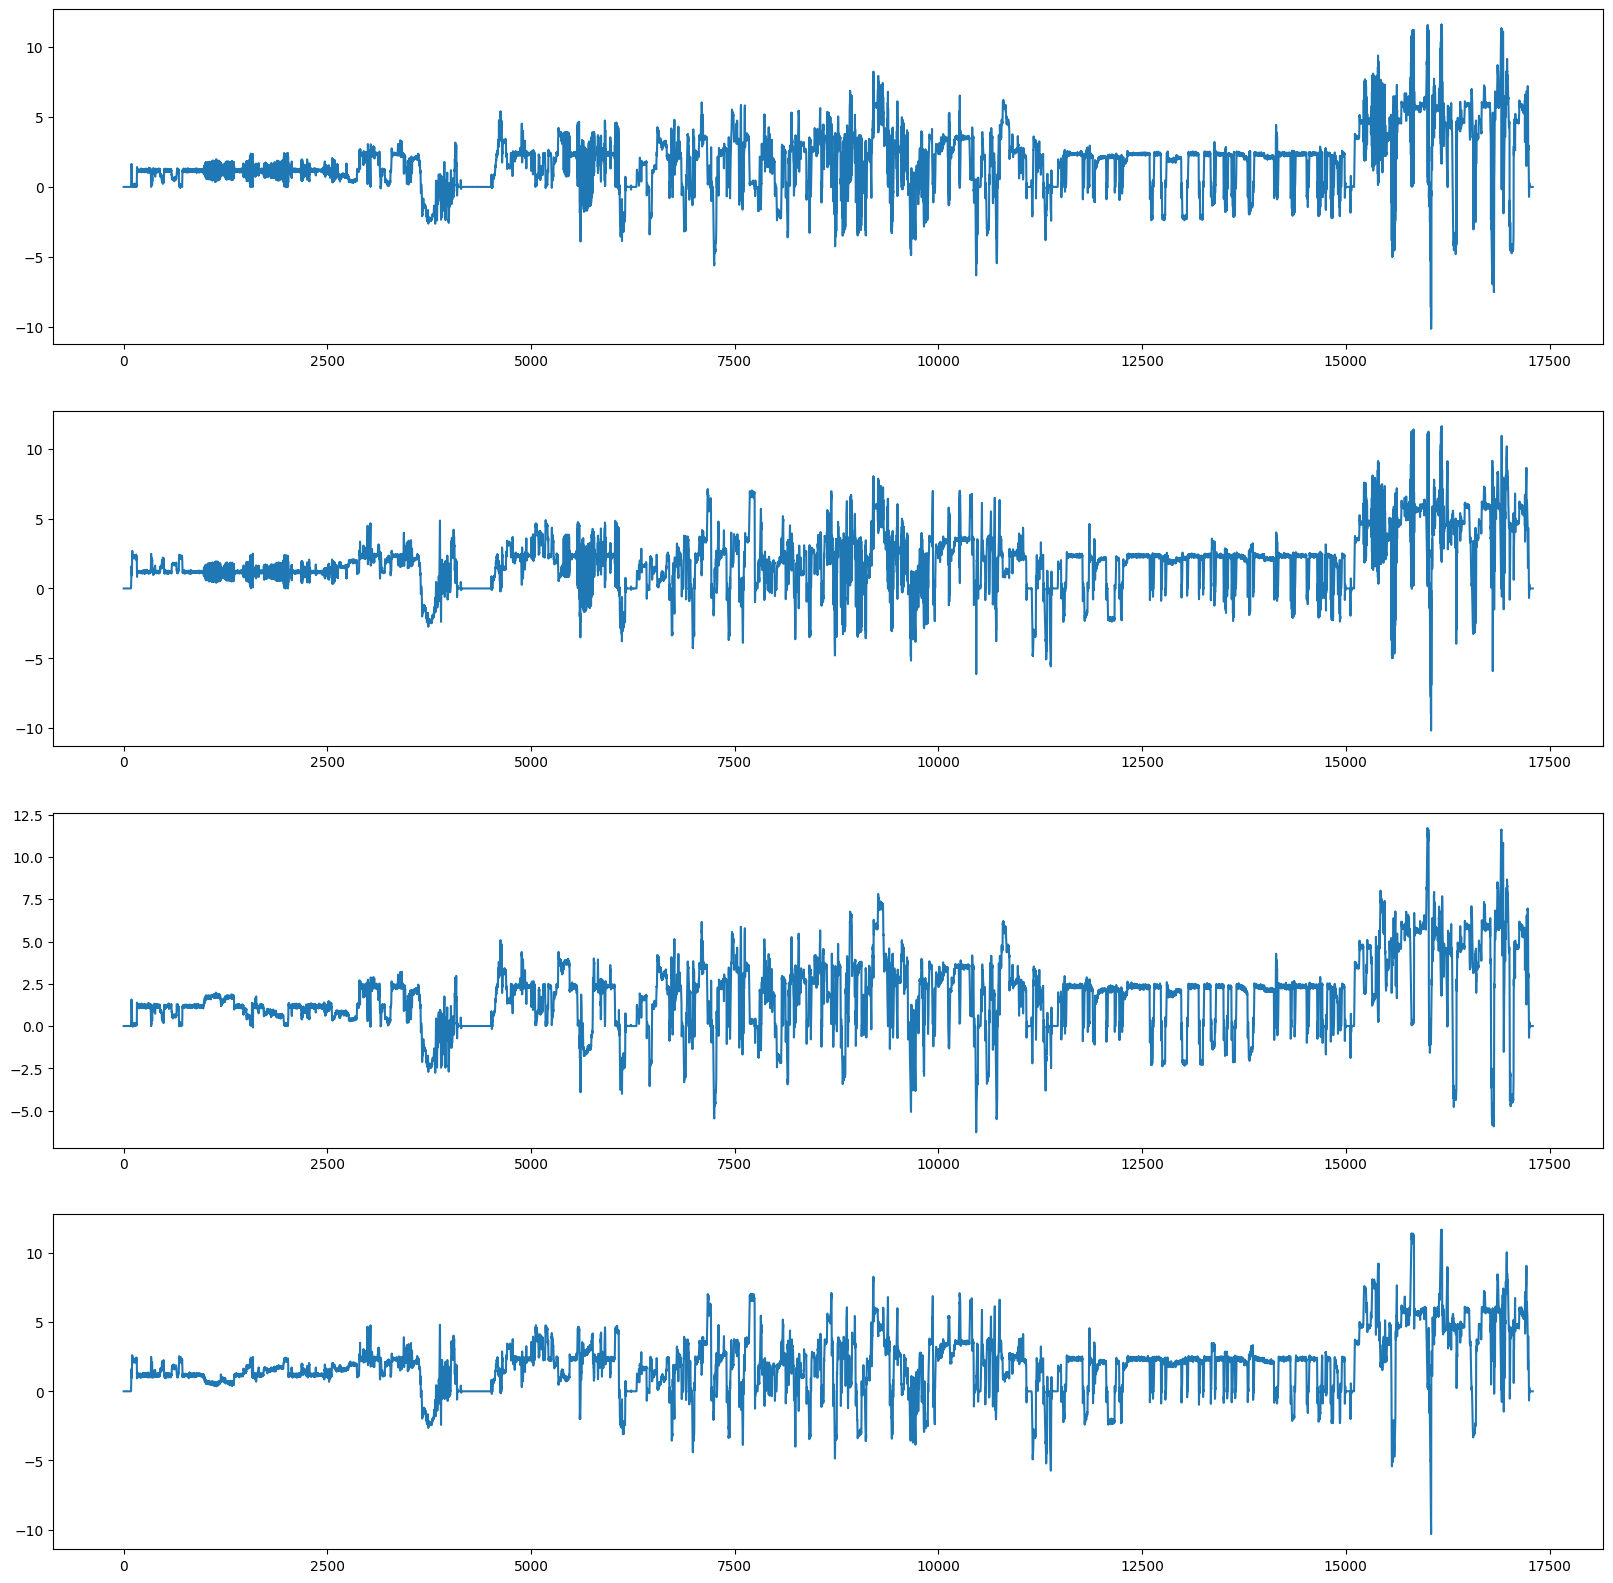

In [24]:
fig, axs = plt.subplots(4, figsize=(20, 20))
axs[0].plot(BL)
axs[1].plot(BR)
axs[2].plot(FL)
axs[3].plot(FR)